### Imports

In [25]:
import os
import numpy as np
import pickle
from helpers.SimulationAnalysis import SimulationAnalysis, readHlist
import matplotlib.pylab as plt
from cycler import cycler

#......new imports (helper class)
import sys
sys.path.insert(0, '/Users/logan_main/nsbp-2023/scripts') # adding to the system path
from hlistHelper import hlist

#......formatting
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}

## Upcoming

In [26]:
# TODO: scatterplot for z = 0.85 upper mass discrepancy investigation (see w2)
# TODO: work on visualization testing for helper class
# TODO: think about ways to model N(tot) as funct. of z
# TODO: other fun visualizations? mess around.

### Redshift resolution :: limit testing

An early conservative estimate from the CDM plot below:
- consider cutting off all z higher than ~5
- range of 0 < z < 5 for x-axis

TODO: come back to these estimates for WDM and other DM models to see if the limit holds.

In [27]:
with open("../data/sim_data.bin", "rb") as f:
    sim_data = pickle.load(f, encoding='latin1')

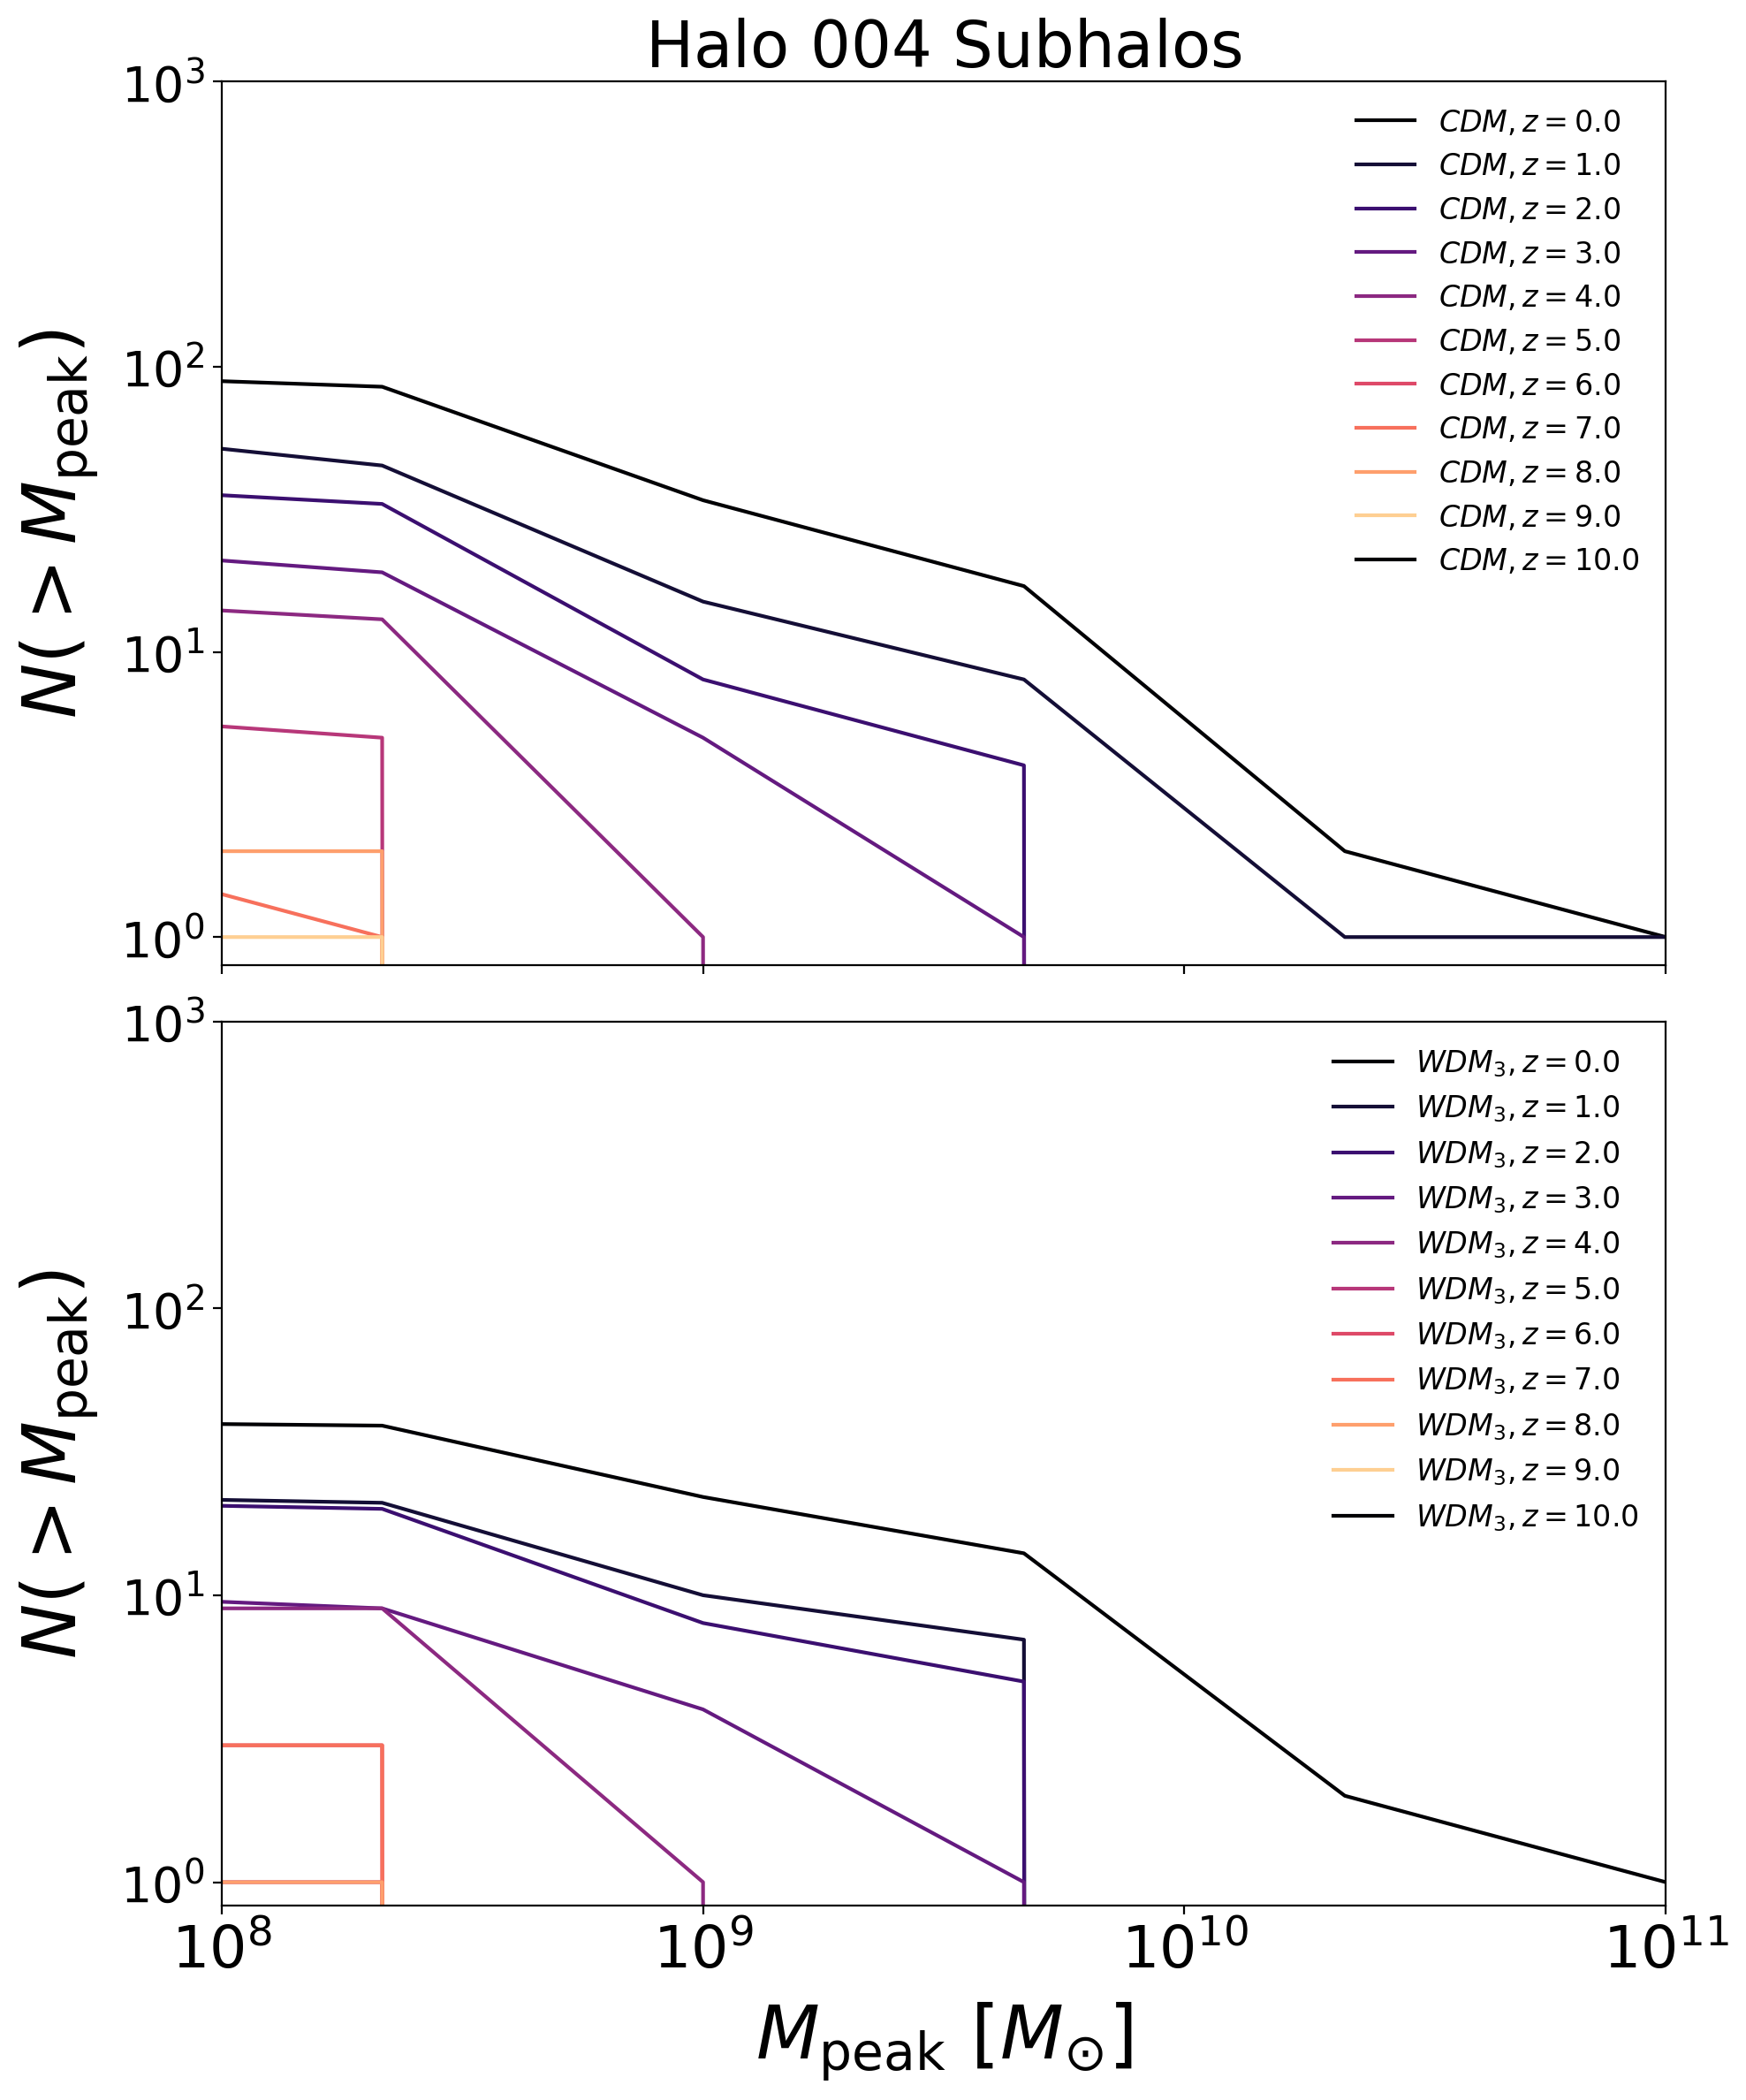

In [33]:
#...... cold dark matter
model = 'cdm'
halo_num = 'Halo004'

cdm = hlist(PATH='../data', halo_num='', model=model)
cdm.load_hlists()
cdm.hmb = sim_data[halo_num][model][0]

#...... warm dark matter, 3 keV
model = 'wdm_3'
wdm = hlist(PATH='../data', halo_num='', model=model)
wdm.load_hlists()
wdm.hmb = sim_data[halo_num][model][0]

redshifts = np.linspace(0, 10, 11) # redshifts up to z = 10, spaced evenly

#....... setting up the plot
f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,12))
bins = np.linspace(5,11,10)

#....... fancy color things
n = 10 # no. of colors
new_colors = [plt.get_cmap('magma')(1. * i/n) for i in range(n)]

plt.rc('axes', prop_cycle=(cycler('color', new_colors)))


#....... cycling through redshifts to plot
for z in redshifts:
    x, y = cdm.shmf_plottables(z)
    ax[0].plot(x, y,label=f'$CDM, z={z}$')

    x, y = wdm.shmf_plottables(z)
    ax[1].plot(x, y,label=f'$WDM_3, z={z}$')


#....... formatting, etc.

ax[0].set_title(r'$\mathrm{Halo\ 004\ Subhalos}$',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':12}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)

ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_yscale('log')
ax[1].set_yticks([1,10,100,1000])
ax[1].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[1].legend(loc=1, ncol=1, prop={'size':12}, frameon=False)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].minorticks_off()

###

plt.tight_layout()
plt.show()

#### trying $V_{max}$ plots (Lovell et al. 2014)
(maybe come back to this?? clearly it didn't work out)